RNN сети, как правило, обучаются очень долго, поэтому советую использовать colab. Ссылка на ноутбук в коллабе: 
https://colab.research.google.com/drive/1bjHi4LwybOtUTd_n3T2UR8lGh81Utgm2

**ДЗ в конце ноутбука. Дедлайн: 19.12**

# Task: Generate names using recurrent neural networks (RNN) and Pytorch

Let us train RNN to generate names;


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Preprocessing

# Our data
The dataset contains ~8k earthling names from different cultures, all in latin transcript.

In [0]:
import os
start_token = " "

with open("names.txt") as f:
    names = f.read()[:-1].split('\n')
    names = [start_token + line for line in names]

In [0]:
print ('n samples = ',len(names))
for x in names[::1000]:
    print (x)
    


n samples =  7944
 Abagael
 Claresta
 Glory
 Liliane
 Prissie
 Geeta
 Giovanne
 Piggy


max length = 16


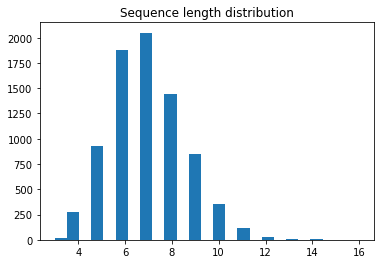

In [0]:
MAX_LENGTH = max(map(len, names))
print("max length =", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, names)),bins=25);

# Text processing

First we need next to collect a "vocabulary" of all unique tokens i.e. unique characters. We can then encode inputs as a sequence of character ids.

In [0]:
#all unique characters go here
tokens = set(''.join(names))

tokens = list(tokens)

num_tokens = len(tokens)
print ('num_tokens = ', num_tokens)

assert 50 < num_tokens < 60, "Names should contain within 50 and 60 unique tokens depending on encoding"

num_tokens =  55


### Convert characters to integers

Torch is built for crunching numbers, not strings. 
To train our neural network, we'll need to replace characters with their indices in tokens list.

Let's compose a dictionary that does this mapping.

In [0]:
token_to_id = {t:i for i,t in enumerate(tokens) }

In [0]:
assert len(tokens) == len(token_to_id), "dictionaries must have same size"

for i in range(num_tokens):
    assert token_to_id[tokens[i]] == i, "token identifier must be it's position in tokens list"

print("Seems alright!")

Seems alright!


In [0]:
def to_matrix(names, max_len=None, pad=token_to_id[' '], dtype='int32', batch_first = True):
    """Casts a list of names into rnn-digestable matrix"""
    
    max_len = max_len or max(map(len, names))
    names_ix = np.zeros([len(names), max_len], dtype) + pad

    for i in range(len(names)):
        line_ix = [token_to_id[c] for c in names[i]]
        names_ix[i, :len(line_ix)] = line_ix
        
    if not batch_first: # convert [batch, time] into [time, batch]
        names_ix = np.transpose(names_ix)

    return names_ix

In [0]:
#Example: cast 4 random names to matrices, pad with zeros
print('\n'.join(names[::2000]))
print(to_matrix(names[::2000]))

 Abagael
 Glory
 Prissie
 Giovanne
[[24 19  7 26 52 26  6 17 24]
 [24 40 17 27 14 47 24 24 24]
 [24 23 14 10 35 35 10  6 24]
 [24 40 10 27 31 26 51 51  6]]


# 2. RNN

# Recurrent neural network


Architecture of a traditional RNN ― Recurrent neural networks, also known as RNNs, are a class of neural networks that allow previous outputs to be used as inputs while having hidden states. So, We can rewrite recurrent neural network as a consecutive application of dense layer to input $x_t$ and previous rnn state $h_t$.

**Recurrent** means the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements.

<img src="https://drive.google.com/uc?export=download&id=1xOAVCNW9uxeBmJsc7lb8qs_ybcpO_UMg"/>


This memory allows the network to learn long-term dependencies in a sequence which means it can take the entire context into account when making a prediction, whether that be the next word in a sentence, a sentiment classification, or the next temperature measurement. A RNN is designed to mimic the human way of processing sequences: we consider the entire sentence when forming a response instead of words by themselves. For example, consider the following sentence:
Since we're training a language model, there should also be:


**“The concert was boring for the first 15 minutes while the band warmed up but then was terribly exciting.”**


A machine learning model that considers the words in isolation — such as a bag of words model — would probably conclude this sentence is negative. An RNN by contrast should be able to see the words “but” and “terribly exciting” and realize that the sentence turns from negative to positive because it has looked at the entire sequence. Reading a whole sequence gives us a context for processing its meaning, a concept encoded in recurrent neural networks.


* An embedding layer that converts character id x_t to a vector.
* An output layer that predicts probabilities of next phoneme



### **The pros and cons of a typical RNN architecture**

| Advantages | Drawbacks 
| --- | --- |
| * Possibility of processing input of any length |Computation being slow | 
| * Model size not increasing with size of input | Difficulty of accessing information from a long time ago | 
| * Computation takes into account historical information | Cannot consider any future input for the current state | 
| * Weights are shared across time |  | 

### **Commonly used activation functions** ―
 The most common activation functions used in RNN modules are described below:

<img src="https://drive.google.com/uc?export=download&id=18jNxL8NB_qiBEnyPvRLmo35k3iJr8YfM"/>


Applications of RNNs ― RNN models are mostly used in the fields of natural language processing and speech recognition. Also used in: Music generation(One-to-many type of RNN), Sentiment classification(Many-to-one), Named entity recognition(Many-to-Many), Machine translation(Many-to-Many)

### About RNNs

Recurrent layers extract features and hidden connections along a sequence.

## Let's look at popular varieties.

#### PureRNN

<img src="https://drive.google.com/uc?export=download&id=17VUNeBmMzrkb2kHfRSPIGqsZgMXsI4yS"/>




#### LSTM
article - http://www.bioinf.jku.at/publications/older/2604.pdf

At the heart of an RNN is a layer made of memory cells. The most popular cell at the moment is the Long Short-Term Memory (LSTM) which maintains a cell state as well as a carry for ensuring that the signal (information in the form of a gradient) is not lost as the sequence is processed. At each time step the LSTM considers the current word, the carry, and the cell state.

<img src="https://drive.google.com/uc?export=download&id=1gtVIOP6C9kLDRUzVYpydAeCvk7AFZg6M"/>


#### GRU
article - https://arxiv.org/abs/1406.1078


<img src="https://drive.google.com/uc?export=download&id=1q5PGW-mOB-i4Reh-Y4KV_ido7dGabhFs"/>


## Try power of the RNNs

<img src="https://drive.google.com/uc?export=download&id=1sRoh075HeffE1isAaHA_6InLGHQLy_8t"/>



In [0]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [0]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=16, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, variable containing vector of int64
        :param h_prev: previous rnn hidden states, variable containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        x_emb = self.embedding(x)
        
        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=1)###YOUR CODE HERE
        h_next = self.rnn_update(x_and_h)
        
        h_next = F.tanh(h_next)
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)###YOUR CODE
        
        return h_next, F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return Variable(torch.zeros(batch_size, self.num_units))

In [0]:
char_rnn = CharRNNCell()

### RNN loop

Once we've defined a single RNN step, we can apply it in a loop to get predictions on each step.

In [0]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []

    for x_t in batch_ix.transpose(0,1):
        hid_state, logp_next = char_rnn(x_t, hid_state)  # <-- here we call your one-step code
        logprobs.append(logp_next)
        
    return torch.stack(logprobs, dim=1)

In [0]:
batch_ix = to_matrix(names[:5])
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logp_seq = rnn_loop(char_rnn, batch_ix)

assert torch.max(logp_seq).data.numpy() <= 0
assert tuple(logp_seq.size()) ==  batch_ix.shape + (num_tokens,)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### Likelihood and gradients

We can now train our neural network to minimize crossentropy (maximize log-likelihood) with the actual next tokens.

To do so in a vectorized manner, we take `batch_ix[:, 1:]` - a matrix of token ids shifted i step to the left so i-th element is acutally the "next token" for i-th prediction

In [0]:
predictions_logp = logp_seq[:, :-1]
actual_next_tokens = batch_ix[:, 1:]

logp_next = torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None])

loss = -logp_next.mean()

In [0]:
loss.backward()

In [0]:
for w in char_rnn.parameters():
    assert w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0, \
        "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (w.size(),)

### The training loop

We train our char-rnn exactly the same way we train any deep learning model: by minibatch sgd.

The only difference is that this time we sample strings, not images or sound.

In [0]:
from IPython.display import clear_output
from random import sample

char_rnn = CharRNNCell()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

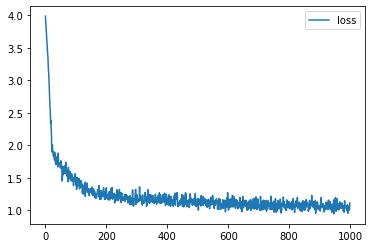

In [0]:
MAX_LENGTH = 16

for i in range(1000):
    batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = rnn_loop(char_rnn, batch_ix)
    
    # compute loss
    #<YOUR CODE>
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = -torch.mean(torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None]))###YOUR CODE
    
    # train with backprop
    loss.backward()
    opt.step()
    opt.zero_grad()
    #<YOUR CODE>
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

### RNN: sampling
Once we've trained our network a bit, let's get to actually generating stuff. 
All we need is the single rnn step function you have defined in `char_rnn.forward`.

In [0]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [0]:
for _ in range(10):
    print(generate_sample(char_rnn))

 Oorstina       
 Jaonna         
 Marsta         
 Kaudi          
 Vauis          
 Mai-           
 wys            
 Clavnci        
 Lrenhorli      
 Jobesey        


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [0]:
for _ in range(50):
    print(generate_sample(char_rnn, seed_phrase=' Trump'))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


 Trumpa         
 Trumpina       
 Trumpie        
 Trumps         
 Trumpin        
 Trumpy         
 Trump          
 Trumpe         
 Trumpin        
 Trumphe        
 Trumpi         
 Trumpi         
 Trumpcite      
 Trumpi         
 Trumpise       
 Trumpina       
 Trumpbii       
 Trumpino       
 Trumphe        
 Trumpy         
 Trumpa         
 Trumpe         
 Trumpi         
 Trumpi         
 Trumpi         
 Trumphena      
 Trumpinge      
 Trumphett-     
 Trumpd         
 Trumpa         
 Trumphee       
 Trumpen        
 Trumphebi      
 Trumpa         
 Trumpel        
 Trumph         
 Trumpne        
 Trumpi         
 Trumpy         
 Trumpte        
 Trumpe         
 Trumpy         
 Trumpno        
 Trumpie        
 Trumpin        
 Trumpe         
 Trumpi         
 Trumpice       
 Trumpiel       
 Trumpiner      


### Try it out!
You've just implemented a recurrent language model that can be tasked with generating any kind of sequence, so there's plenty of data you can try it on:

* Novels/poems/songs of your favorite author
* News titles/clickbait titles
* Source code of Linux or Tensorflow
* Molecules in [smiles](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) format
* Melody in notes/chords format
* Ikea catalog titles
* Pokemon names
* Cards from Magic, the Gathering / Hearthstone

If you're willing to give it a try, here's what you wanna look at:
* Current data format is a sequence of lines, so a novel can be formatted as a list of sentences. Alternatively, you can change data preprocessing altogether.
* While some datasets are readily available, others can only be scraped from the web. Try `Selenium` or `Scrapy` for that.
* Make sure MAX_LENGTH is adjusted for longer datasets. There's also a bonus section about dynamic RNNs at the bottom.
* More complex tasks require larger RNN architecture, try more neurons or several layers. It would also require more training iterations.
* Long-term dependencies in music, novels or molecules are better handled with LSTM or GRU

__Good hunting!__

### More seriously

What we just did is a manual low-level implementation of RNN. While it's cool, i guess you won't like the idea of re-writing it from scratch on every occasion. 

As you might have guessed, torch has a solution for this. To be more specific, there are two options:
* `nn.RNNCell(emb_size, rnn_num_units)` - implements a single step of RNN just like you did. Basically concat-linear-tanh
* `nn.RNN(emb_size, rnn_num_units` - implements the whole rnn_loop for you.

There's also `nn.LSTMCell` vs `nn.LSTM`, `nn.GRUCell` vs `nn.GRU`, etc. etc.

In this example we'll rewrite the char_rnn and rnn_loop using high-level rnn API.

In [0]:
class CharRNNLoop(nn.Module):
    def __init__(self, num_tokens=num_tokens, emb_size=16, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units, batch_first=True)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x):
        assert isinstance(x, Variable) and isinstance(x.data, torch.LongTensor)
        h_seq, _ = self.rnn(self.emb(x))
        next_logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp
    
model = CharRNNLoop()
opt = torch.optim.Adam(model.parameters())
history = []

In [0]:
# the model applies over the whole sequence
batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)
batch_ix = Variable(torch.LongTensor(batch_ix))

logp_seq = model(batch_ix)

# compute loss. This time we use nll_loss with some duct tape
loss = F.nll_loss(logp_seq[:, 1:].contiguous().view(-1, num_tokens), 
                  batch_ix[:, :-1].contiguous().view(-1))

loss.backward()

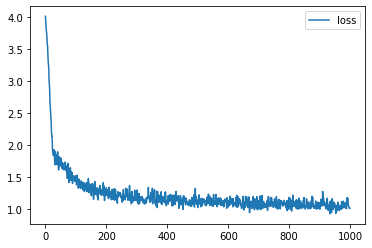

In [0]:
MAX_LENGTH = 16

for i in range(1000):
    batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = model(batch_ix)
    
    # compute loss
    #<YOUR CODE>
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = -torch.mean(torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None]))###YOUR CODE
    
    # train with backprop
    loss.backward()
    opt.step()
    opt.zero_grad()
    #<YOUR CODE>
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Here's another example

In [0]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class CharLSTMCell(nn.Module):
    """
    Implements something like CharRNNCell, but with LSTM
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=16, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        self.emb = nn.Embedding(num_tokens, embedding_size)
        self.lstm = nn.LSTMCell(embedding_size, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, prev_state):
        (prev_h, prev_c) = prev_state
        (next_h, next_c) = self.lstm(self.emb(x), (prev_h, prev_c))
        logits = self.rnn_to_logits(next_h)
        
        return (next_h, next_c), F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """ LSTM has two state variables, cell and hid """
        return Variable(torch.zeros(batch_size, self.num_units)), Variable(torch.zeros(batch_size, self.num_units))
    
char_lstm = CharLSTMCell()

In [0]:
# the model applies over the whole sequence
batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)
batch_ix = Variable(torch.LongTensor(batch_ix))

logp_seq = rnn_loop(char_lstm, batch_ix)

# compute loss. This time we use nll_loss with some duct tape
loss = F.nll_loss(logp_seq[:, 1:].contiguous().view(-1, num_tokens), 
                  batch_ix[:, :-1].contiguous().view(-1))

loss.backward()

# HW:

* train the LSTM model (at least 1000 epochs), plot loss history.
* write a function for generating samples and generate some names using LSTM model
* Implement a model that uses 2 LSTM layers (the second lstm uses the first as input and train it on your data.

Useful Links:

- [Recurrent Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)
- [Recurrent Neural Networks cs231 Stanford](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture10.pdf)